Part 1: Creating the GitHub Repo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# Fetching the dataset 
automobile = fetch_ucirepo(id=10)

In [2]:
# Overview of the entire automobile dataset
automobile.data.features

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


Part 2: Performing Initial EDA, Data Wrangling and Pre-Processing 

In [3]:
print("\nSample of the Dataset:")
automobile.data.features.sample(5)

# More to come.


Sample of the Dataset:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
150,5348.0,39,35,4800.0,62.0,9.0,3.03,3.05,2bbl,92,...,158.7,95.7,front,fwd,hatchback,2.0,std,gas,toyota,87.0
25,6692.0,38,31,5500.0,68.0,9.4,3.23,2.97,2bbl,90,...,157.3,93.7,front,fwd,sedan,4.0,std,gas,dodge,148.0
136,18150.0,26,19,5500.0,160.0,9.0,3.07,3.54,mpfi,121,...,186.6,99.1,front,fwd,hatchback,2.0,turbo,gas,saab,150.0
204,22625.0,25,19,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
195,13415.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,104.3,front,rwd,wagon,4.0,std,gas,volvo,74.0


In [4]:
# Check data types and missing values

print("\nData Types:")
automobile.data.features.dtypes


Data Types:


price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [5]:
# Checking the missing values as listed on the UCI website

print("\nMissing Values:")
automobile.data.features.isnull().sum()


Missing Values:


price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [6]:
# Summary statistics

print("\nSummary Statistics:")
automobile.data.features.describe(include='all')


Summary Statistics:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205.000000,205,205,205,203.000000,205,205,205,164.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,2,3,5,NaN,2,2,22,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,NaN,202,120,96,NaN,168,185,32,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,174.049268,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,12.337289,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,141.100000,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,166.300000,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,173.200000,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,183.100000,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000


In [7]:
# Print unique values in the columns for categorical variables
print("\nUnique Values in the Columns:")
# Extract the names of categorical columns from the 'automobile' dataset
categorical_columns = automobile.variables[automobile.variables['type'] == 'Categorical']['name'].tolist()
# Iterate over each categorical column and print unique values along with their counts
for column in categorical_columns:
    print(column, ":")
    print(automobile.data.features[column].value_counts())
    print("\n")


Unique Values in the Columns:
fuel-system :
fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


engine-type :
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


drive-wheels :
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


body-style :
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


make :
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1

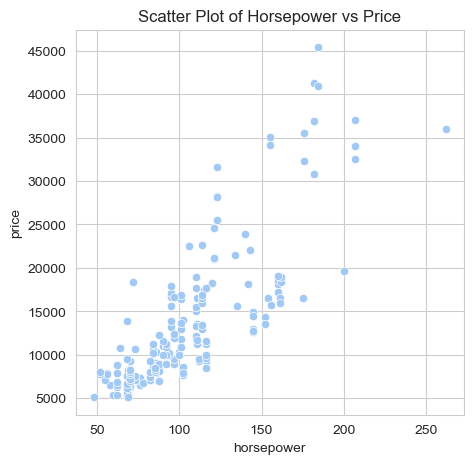

In [58]:
plt.figure(figsize=(5, 5))

sns.set_style("whitegrid")
sns.set_palette("pastel")

sns.scatterplot(x=automobile.data.features['horsepower'], y=automobile.data.features['price'])

plt.title('Scatter Plot of Horsepower vs Price')
plt.show()

In [9]:
# Handle missing values
# Replacing missing values in 'normalized-losses' with the mean (122.0)
automobile.data.features.loc[:, 'normalized-losses'] = automobile.data.features['normalized-losses'].fillna(automobile.data.features['normalized-losses'].mean())

In [10]:
automobile.data.features['normalized-losses'].mean()

122.0

In [11]:
# For part 3, compare the "price" var to other vars in out dataframe to create our model and analyze it. Using histograms to search for the mean and medians of each model.
# For the short summary of each model, describe the .describe attributes as well as the Histogram (mean, median, mode, standard deviation) all in the read.me

Part 3: Creating the Model and Write-up

In [12]:
automobile.data.features['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [13]:
horsepower_counts=automobile.data.features['horsepower'].value_counts().reset_index()
horsepower_counts

,horsepower,count
0,68.0,19
1,70.0,11
2,69.0,10
3,116.0,9
4,110.0,8
5,95.0,7
6,114.0,6
7,160.0,6
8,101.0,6
9,62.0,6


Text(0.5, 1.0, 'Histogram of the Horsepower Count')

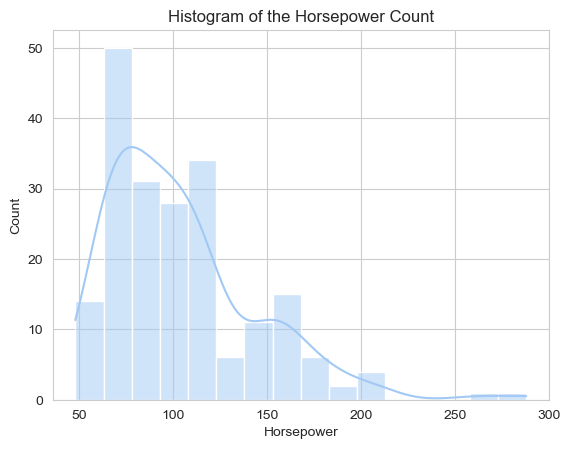

In [53]:
sns.histplot(automobile.data.features['horsepower'], kde=True)

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Histogram of the Horsepower Count')

In [15]:
automobile.data.features.describe()['horsepower']

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [16]:
automobile.data.features['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64

In [17]:
peak_rpm_counts=automobile.data.features['peak-rpm'].value_counts().reset_index()
peak_rpm_counts

,peak-rpm,count
0,5500.0,37
1,4800.0,36
2,5000.0,27
3,5200.0,23
4,5400.0,13
5,6000.0,9
6,5800.0,7
7,5250.0,7
8,4500.0,7
9,4150.0,5


Text(0.5, 1.0, 'Histogram of the Peak RPM Count')

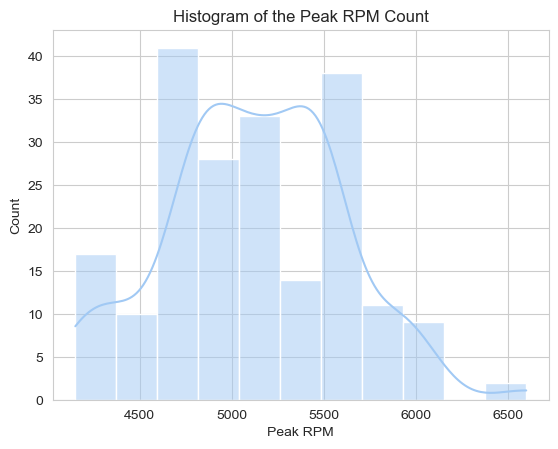

In [54]:
sns.histplot(automobile.data.features['peak-rpm'], kde=True)

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.xlabel('Peak RPM')
plt.ylabel('Count')
plt.title('Histogram of the Peak RPM Count')

In [19]:
automobile.data.features.describe()['peak-rpm']

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

In [20]:
automobile.data.features['city-mpg']

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [21]:
city_mpg_counts=automobile.data.features['city-mpg'].value_counts().reset_index()
city_mpg_counts

,city-mpg,count
0,31,28
1,19,27
2,24,22
3,27,14
4,17,13
5,26,12
6,23,12
7,21,8
8,25,8
9,30,8


Text(0.5, 1.0, 'Histogram of the City MPG Count')

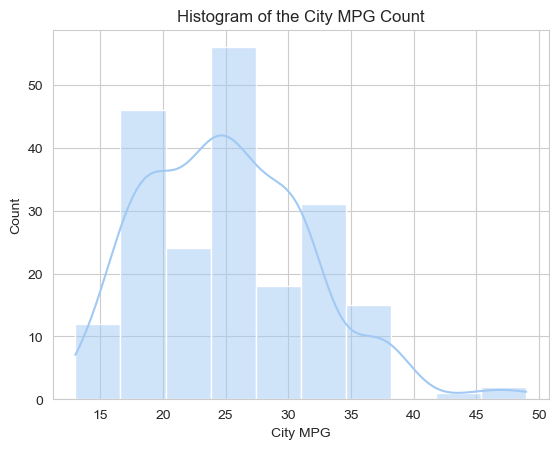

In [55]:
sns.histplot(automobile.data.features['city-mpg'], kde=True)

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.xlabel('City MPG')
plt.ylabel('Count')
plt.title('Histogram of the City MPG Count')

In [23]:
automobile.data.features.describe()['city-mpg']

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [33]:
automobile.data.features.describe()['city-mpg']

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [24]:
automobile.data.features['highway-mpg']

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64

In [25]:
highway_mpg_counts=automobile.data.features['highway-mpg'].value_counts().reset_index()
highway_mpg_counts

,highway-mpg,count
0,25,19
1,38,17
2,24,17
3,30,16
4,32,16
5,34,14
6,37,13
7,28,13
8,29,10
9,33,9


Text(0.5, 1.0, 'Histogram of the Highway MPG Count')

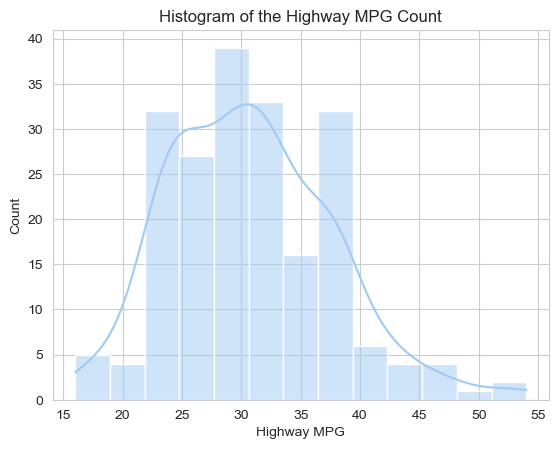

In [56]:
sns.histplot(automobile.data.features['highway-mpg'], kde=True)

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.xlabel('Highway MPG')
plt.ylabel('Count')
plt.title('Histogram of the Highway MPG Count')

In [27]:
automobile.data.features.describe()['highway-mpg']

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

In [34]:
automobile.data.features.describe()['highway-mpg']

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

In [28]:
automobile.data.features['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [29]:
price_counts=automobile.data.features['price'].value_counts().reset_index()
price_counts

,price,count
0,8921.0,2
1,18150.0,2
2,8845.0,2
3,8495.0,2
4,7609.0,2
...,...,...
181,45400.0,1
182,16503.0,1
183,5389.0,1
184,6189.0,1


Text(0.5, 1.0, 'Histogram of the Price Count')

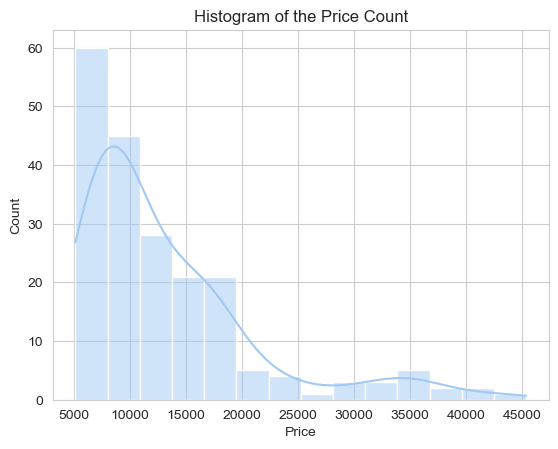

In [57]:
sns.histplot(automobile.data.features['price'], kde=True)

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of the Price Count')

In [31]:
automobile.data.features.describe()['price']

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64